beam1.png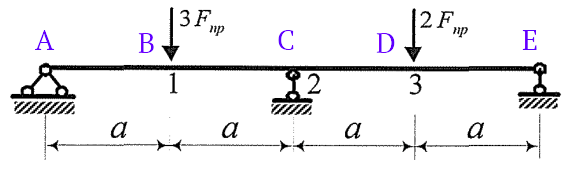

Номера переменных:

1. $R_A$
1. $M_B$
1. $R_C$
1. $M_C$
1. $M_D$
1. $R_E$
1. $F$



Уравнения равновесия:

$\Sigma Fy = 0$; $R_A + R_C + R_E - 5 F = 0$ (1)

$\Sigma m_A = 0$; $ 3 F \cdot 1 - R_C \cdot 2 + 2 F \cdot 3 - R_E \cdot 4 = 0 $ (2)

$\Sigma m_E = 0$; $ R_A \cdot 4 - 3 F \cdot 3 + R_C \cdot 2 - 2 F \cdot 1= 0 $ (3)


&nbsp;


Уравнения для внутренних моментов:

(правило знаков : слева от сечения: + по ходу часовой стрелки; справа от сечения: + против хода часовой стрелки)

$M_B^{лев} = R_A \cdot 1$

$M_C^{лев} = R_A \cdot 2 - 3 F \cdot 1$

$M_D^{прав} = R_E \cdot 1$


&nbsp;

Уравнения статически допустимого состояния:

$ |M_B| \le M_{пр} $

$ |M_C| \le M_{пр} $

$ |M_D| \le M_{пр} $


Целевая функция:

$F \rightarrow max$

In [1]:
# для запуска в mybinder.com:
# установка модулей
# убрать символ # в начале следующих строк и запустить ячейку
# !pip install numpy
# !pip install scipy

In [1]:
import numpy as np
from scipy.optimize import linprog

# выводить 4 знака после запятой, выводить маленькие (по модулю) числа как 0
np.set_printoptions(precision=4, suppress=True)

In [2]:
#               RA MB RC   MC MD RE    F
#                1  2  3    4  5  6    7
A = np.array( [ # уравнения равновесия. равенства
                [1, 0, 1,   0, 0, 1,  -5],  # y
                [0, 0,-2,   0, 0,-4,   9],  # A
                [4, 0, 2,   0, 0, 0, -11],  # E
                # Уравнения для внутренних моментов. равенства
                [-1, 1,0,   0, 0, 0,   0],  # B слева
                [-2, 0,0,   1, 0, 0,   3],  # C слева
                [ 0, 0,0,   0, 1,-1,   0]   # D справа
              ] )

# коэффициенты при неизвестных в целевой функции
opt_fun = [0,0,0, 0,0,0, -1]  # -1, ибо функция -> max, а программа минимизирует функцию

# ограничение предельного момента
absM = 300  # вычисляется Wпр = sigma_Т * W; (см. лекцию 1)

# ограничение для сил
absF = 10000  # задаётся заведомо недостижимое значение. если линейное программирование не срабатывает, 
              # то значение нужно увеличить\уменьшить

linprog( opt_fun, A_eq = A, 
        b_eq = [0]*6,  # правые части для равенств 
        bounds=( (-absF, absF), (-absM, absM), (-absF, absF),
                 (-absM, absM), (-absM, absM), (-absF, absF),
                 (-absF, absF) ),
        method = 'interior-point' )

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_linprog_ip.py:643: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


     con: array([-0.,  0., -0., -0.,  0., -0.])
     fun: -299.9999915957469
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 300.,  300., 1050., -300.,  150.,  150.,  300.])

Ответ:

x: array([ 299.9999913 ,  299.99999861, 1049.99999002, -299.99999995,
       -149.99999949,  149.99999173,  299.9999916 ])
       
1. $R_A$ = 299.9999913
1. $M_B$ = 299.99999861
1. $R_C$ = 1049.99999002
1. $M_C$ = -299.99999995
1. $M_D$ = 149.99999949
1. $R_E$ = 149.99999173
1. $F$   = 299.9999916


#### Контроль корректности решения:
- success: True
- В этой схеме возникает 2 пластических шарнира, значит только два момента должны иметь предельное значение (см. выше absM)

#### Где возникают пластические шарниры?
точки: B и C

# Проектировочный расчёт

## Простой случай: везде одинаковое сечение

- Для заданной силы найти моменты
- По пластическим моментам определить площадь поперечного сечения


## Оптимизация конструкции: выбор разных сечений в разных частях конструкции
- Сила задана.
- Для каждой части конструкции можно выбрать разную площадь поперечного сечения
- Требуется минимизировать объём V материала рамы или балки
$$V = \Sigma l_i A _i$$
    - $l_i$ - длинна i-й части тела
    - $A_i$ -  площадь поперечного сечения длинна i-й части тела
    
- Целевая функция линейного программирования: $$ \Sigma l_i A_i \rightarrow min $$

- На практике, можно заменить целевую функцию на следующую:
 $$ \Sigma l_i М_{пл,i} \rightarrow min $$
     - $М_{пл,i}$ - пластический момент i-й части тела
 
 - Такая функция удобнее, потому как включает пластические моменты входящие в уравнения внутренних моментов

### Пример

- Разделим конструкцию на две части: AC и CE
- Обозначим пластические моменты для этих частей соответственно: $M_{пл}^{AC}, M_{пл}^{CE}$
- Тогда целевая функция нелинейного программирования:

$$ 2 a M_{пл}^{AC} + 2 a M_{пл}^{CE} \rightarrow min$$

- Для примера рассмотрим значение силы F = 1000 H, $a=1$
- Уравнения равновесия:

    (1)  &emsp; $\Sigma Fy = 0$; $R_A + R_C + R_E - 5000 = 0$
    
    (2)  &emsp; $\Sigma m_A = 0$; $ - R_C \cdot 2 - R_E \cdot 4 + 9000 \cdot 1= 0 $
    
    (3)  &emsp; $\Sigma m_E = 0$; $ R_A \cdot 4 + R_C \cdot 2 - 11000 \cdot 1= 0 $


 - Уравнения для внутренних моментов:
 
 (правило знаков : слева от сечения: + по ходу часовой стрелки; справа от сечения: против хода часовой стрелки)

     (4)  &emsp; $M_B^{лев} = R_A \cdot 1$; &emsp; => &emsp; $M_B^{лев} - R_A \cdot 1 = 0$
     
     (5)  &emsp; $M_C^{лев} = R_A \cdot 2 - 3000 \cdot 1$; &emsp; => &emsp; $M_C^{лев} - R_A \cdot 2 =  - 3000 \cdot 1$;
     
     (6)  &emsp; $M_D^{прав} = R_E \cdot 1$; &emsp; => &emsp; $M_D^{прав} + R_E \cdot 1 = 0$;


- Ограничения для моментов:

    (7)  &emsp; $ |M_B| \le M_{пл}^{AC} $
    
    (8)  &emsp; $ |M_C| \le M_{пл}^{AC} $
    
    (9)  &emsp; $ |M_C| \le M_{пл}^{CE} $

    (10)  &emsp;$ |M_D| \le M_{пл}^{CE} $


- Целевая функция:
  $ M_{пл}^{AC} \cdot 2  +  M_{пл}^{AC} \cdot 2 \rightarrow min $

Пронумеруем переменные
1. $R_A$
1. $M_B$
1. $R_C$
1. $M_C$
1. $M_D$
1. $R_E$
1. $M_{пл}^{AC}$
1. $M_{пл}^{CE}$
1. $F$

In [3]:
F = 300   # вычисленное ранее предельное значение силы F

# ограничение предельного момента
absM = 300  # вычисляется Wпр = sigma_Т * W; (см. лекцию 1)

# ограничение для сил
absF = 100000  # задаётся заведомо недостижимое значение. если линейное программирование не срабатывает, 
              # то значение нужно увеличить\уменьшить


# уравнения равновесия. равенства (1)-(6)   
#       RA MB RC   MC MD RE  Mac Mce F
A  = [ [ 1, 0, 1,  0, 0, 1,  0,  0,   -5],   # y
       [ 0, 0,-2,  0, 0,-4,  0,  0,    9],   # A
       [ 4, 0, 2,  0, 0, 0,  0,  0,  -11],   # E
# Уравнения для внутренних моментов. равенства
       [-1,1, 0,   0, 0, 0,  0,  0,    0],  # Mb left
       [-2,0, 0,   1, 0, 0,  0,  0,    3],  # Mc left
       [ 0,0, 0,   0, 1,-1,  0,  0,    0]  # Md right
    ] 

B = [0] * len(A)


# неравенства (7)-(10)
#        RA MB RC    MC MD  RE  Mac Mce F
Aub = [
       [ 0, 1, 0,    0, 0,  0, -1,  0,  0],  # Mb
       [ 0, 0, 0,   -1, 0,  0, -1,  0,  0],  # Mc в предыдущем решении получилось отрицательным, поэтому
       [ 0, 0, 0,   -1, 0,  0,  0, -1,  0],  # сделаем его положительным в этих уравнениях поставив коэф. -1      
       [ 0, 0, 0,    0, 1,  0,  0, -1,  0],  # Md
         ]
# 
Bub = [0] * len(Aub)   # правые части неравенств

# коэффициенты при неизвестных в целевой функции
#          RA MB RC  MC MD RE  Mac Mce  F
#          1  2  3   4  5  6    7   8   9
opt_fun = [0, 0, 0,  0, 0, 0,   2,  2,  0] 



linprog( opt_fun, A_eq = A, 
                  b_eq = B,  # правые части для равенств 
                  A_ub = Aub,
                  b_ub = Bub,
        
        bounds=( (-absF, absF),(-absM, absM),(-absF, absF),
                 (-absM, absM),(-absM, absM),(-absF, absF), 
                 (0, absM), (0, absM),   # расчётный момент балки должен быть положительным
                 (F - 1/10, F + 1/1)    # Зададим границы для F, используя ранее вычисленное значение
               ),
        method = 'interior-point')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_linprog_ip.py:643: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning)


     con: array([-0., -0., -0.,  0.,  0., -0.])
     fun: 1199.400000074415
 message: 'Optimization terminated successfully.'
     nit: 14
   slack: array([  0.  ,   0.3 ,   0.  , 149.65])
  status: 0
 success: True
       x: array([ 300.  ,  300.  , 1049.45, -299.7 ,  150.05,  150.05,  300.  ,
        299.7 ,  299.9 ])

In [4]:
#  RA MB RC  MC MD RE  Mac Mce  F

#### Ответ:
1. $R_A$ = 300 kH
1. $M_B$ = 300 kH*m
1. $R_C$ = 1049.45 kH

1. $M_C$ = -299.7 kH*m
1. $M_D$ = 150.05 kH*m
1. $R_E$ = 150.05 kH

1. **$M_{AC}$ = 300** kH*m
1. **$M_{CE}$ = 299.7** kH*m

1. $F$   = 299.9 kH

#### Контроль корректности решения:
1. message: 'Optimization terminated successfully.'
1. success: True

1. Моменты для частей конструкции ($M_{AC}$ и $M_{CE}$) положительны
1. Пластические шарниры возникают в тех же сечениях
1. Выполняются неравенства (7) - (10)

#### Сравнение с предыдущим результатом

Для оценки оптимизации сравним характеристику объёма балок $V = \Sigma l_i М_{пл,i}$.

В предыдущем расчёте балка имела сопротивление изгибу 300 kH*m, длина балки - 4 м.

Тогда характеристика объёма $V_1 = 300 \cdot 4 = 1200 $


В проектировочном расчёте для первой части балки был получены значения для сопротивления изгибу:$M_{AC}$ = 300 kH*m, (длина участка балки 2 м)
$M_{CE} \approx$ 300 kH*m (длина участка балки 2 м)

Характеристика объёма $V_2 = 300 \cdot 2 + 300 \cdot 2 = 1200 $



#### Вывод:

$V_1 = V_2 = 1200 $
Объёмы балки после оптимизации не изменились.

Моменты всех частей конструкции нужно оставить одинаковыми. 

**Оптимизация рамы не требуется.**

*Если бы один из моментов оказался меньше остальных, то соответствующую ему часть конструкции можно было бы оптимизировать уменьшив сечение*

#### Дополнительно:
Пластический шарнир в точке С накладывает ограничение на сопротивление изгибу $M_{CE}$, но в остальной части балки правее точки С нет больших моментов. Предположим, что пластический шарнир находится только слева от т. С (или правая часть балки с сопротивлением изгибу $M_{CE}$ заканчивается не в точке С, а правее). Уберём уравнение 9 и закомментируем строчку в программе, задающую коэффициенты этого уравнения. Вычислим переменные заново.

Сопротивление изгибу $M_{CE}$ уменьшилось. Что ещё раз подчёркивает корректность полученного решения.